# Experiment 2: Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embedding for,
1. Select 10 words from a specific domain (e.g., sports, technology) and visualize their embedding.
2. Analyse clusters and relationships.  
3. Generate contextually rich outputs using embedding.  
4. Write a program to generate 5 semantically similar words for a given input.


In [5]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [6]:
import gensim
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

# Define model path in Google Drive

In [7]:
model_path = "/content/drive/My Drive/word2vec-google-news-300.model"

# Step 1: Mount Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 2: Check if model already exists

 Model found! Loading the saved model...
Fetching word embeddings...
Applying PCA...


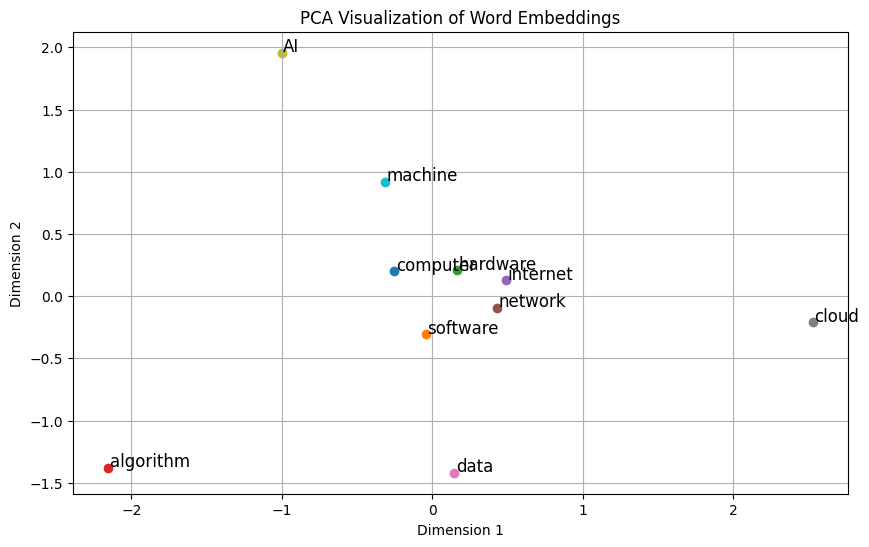

Applying t-SNE...


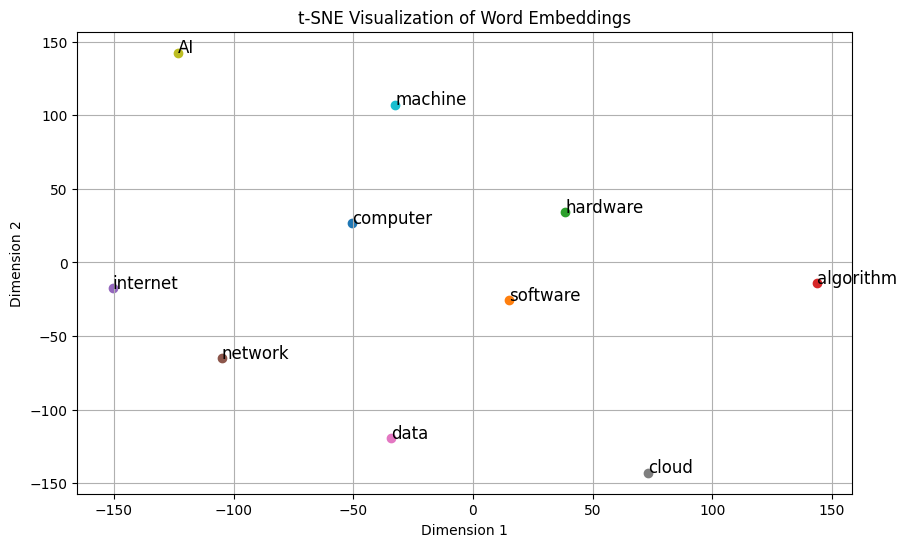

Finding words similar to 'computer'...
Top similar words: ['computers', 'laptop', 'laptop_computer', 'Computer', 'com_puter']


In [9]:
if os.path.exists(model_path):
    print(" Model found! Loading the saved model...")
    word2vec_model = gensim.models.KeyedVectors.load(model_path, mmap='r')
else:
  print("Model not found. Downloading now...")
  word2vec_model = api.load("word2vec-google-news-300")
  # Save the downloaded model to Google Drive
  print("Saving model to Google Drive...")
  word2vec_model.save(model_path)
  print(" Model saved successfully!")

def get_word_vectors(model, words):
   return np.array([model[word] for word in words if word in model])

def reduce_dimensions(vectors, method='pca'):
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=5)
    else:
        raise ValueError("Method should be 'pca' or 'tsne'")
    return reducer.fit_transform(vectors)

def plot_embeddings(words, reduced_vectors, title):
    plt.figure(figsize=(10, 6))
    for word, coord in zip(words, reduced_vectors):
      plt.scatter(coord[0], coord[1], marker='o')
      plt.text(coord[0] + 0.01, coord[1] + 0.01, word, fontsize=12)
    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid()
    plt.show()


def find_similar_words(model, word, top_n=5):

    if word in model:
        similar_words = model.most_similar(word, topn=top_n)
        return [w[0] for w in similar_words]
    else:
        return ["Word not in vocabulary"]

# Define 10 words from the technology domain
tech_words = ["computer", "software", "hardware", "algorithm", "internet",
              "network", "data", "cloud", "AI", "machine"]
# Get word embeddings
print("Fetching word embeddings...")
word_vectors = get_word_vectors(word2vec_model, tech_words)

# Reduce dimensions using PCA
print("Applying PCA...")
reduced_vectors_pca = reduce_dimensions(word_vectors, method='pca')
plot_embeddings(tech_words, reduced_vectors_pca, title="PCA Visualization of Word Embeddings")

# Reduce dimensions using t-SNE
print("Applying t-SNE...")
reduced_vectors_tsne = reduce_dimensions(word_vectors, method='tsne')
plot_embeddings(tech_words, reduced_vectors_tsne, title="t-SNE Visualization of Word Embeddings")

# Find similar words
input_word = "computer"
print(f"Finding words similar to '{input_word}'...")
similar = find_similar_words(word2vec_model, input_word)
print("Top similar words:", similar)